# Data Cleansing

Notebook ini membaca `tokopedia_reviews.csv`, membersihkan teks tokopedia_reviews, menghapus duplikat, dan menyimpan hasilnya ke `ulasan_bersih.csv`.

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [3]:
# Baca file CSV
df = pd.read_csv('tokopedia_reviews.csv')
df.head()

,Ulasan
0,belum di coba tapi semoga cocok di wajah ku un...
1,hasil cushion nya flawles banget di wajah ring...
2,semoga cocok baru pertama kali beli produk g2g...
3,"barang sesuai, terimakasih min 🙏"
4,packaging nya keren. packaging nya keren.


In [73]:
#Bersihkan kolom teks ulasan
def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # lowercase
    text = text.replace('\n', ' ')  # hilangkan baris baru
    text = text.replace('!', '').replace('?', '')  # hilangkan tanda
    text = ''.join(char for char in text if char.isalnum() or char.isspace())  # hanya huruf & spasi
    return text.strip()

df["cleaned_review"] = df["Ulasan"].apply(clean_text)

In [60]:
# Identifikasi sentimen manual (berdasarkan kata kunci sederhana)
def classify_sentiment(text):
    positif = ["bagus", "mantap", "cepat", "puas", "baik", "oke", "top", "suka", "recommended", "rekomendasi"]
    negatif = ["jelek", "lama", "rusak", "buruk", "parah", "kecewa", "tidak sesuai", "mengecewakan", "cacat"]

    if any(word in text for word in positif):
        return "Positif"
    elif any(word in text for word in negatif):
        return "Negatif"
    elif text == "":
        return "Kosong"
    else:
        return "Netral"

df["sentimen"] = df["cleaned_review"].apply(classify_sentiment)

In [61]:
df['Ulasan_Bersih'] = df['Ulasan'].apply(bersihkan_teks)
df[['Ulasan', 'Ulasan_Bersih']].head()

,Ulasan,Ulasan_Bersih
0,belum di coba tapi semoga cocok di wajah ku un...,belum di coba tapi semoga cocok di wajah ku un...
1,hasil cushion nya flawles banget di wajah ring...,hasil cushion nya flawles banget di wajah ring...
2,semoga cocok baru pertama kali beli produk g2g...,semoga cocok baru pertama kali beli produk g2g...
3,"barang sesuai, terimakasih min 🙏",barang sesuai terimakasih min
4,packaging nya keren. packaging nya keren.,packaging nya keren packaging nya keren


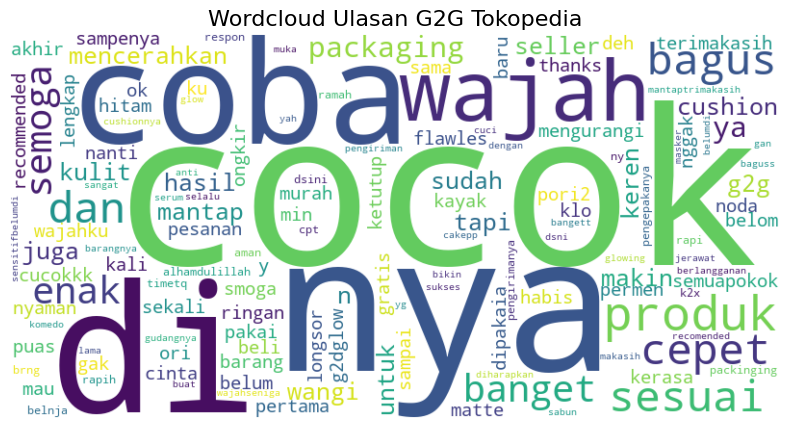

In [62]:
text = ' '.join(df['Ulasan_Bersih'].astype(str))
wordcloud = WordCloud (width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud Ulasan G2G Tokopedia", fontsize=16)
plt.show()

In [63]:

#Tampilkan ringkasan jumlah per kategori sentimen
sentimen_counts = df["sentimen"].value_counts()
print("Jumlah sentimen:")
print(sentimen_counts)



Jumlah sentimen:
sentimen
Netral     20
Positif     7
Negatif     1
Name: count, dtype: int64


In [ ]:
# 5. Tampilkan sebagian hasil
print("\ndata data:")
print(df[["Ulasan", "cleaned_review", "sentimen"]].head(10))


Contoh data:
                                               Ulasan  \
0   belum di coba tapi semoga cocok di wajah ku un...   
1   hasil cushion nya flawles banget di wajah ring...   
2   semoga cocok baru pertama kali beli produk g2g...   
3                    barang sesuai, terimakasih min 🙏   
4           packaging nya keren. packaging nya keren.   
5                                         puas sekali   
7                      Dipakaia matte dan gak longsor   
8         mantap sesuai pesanan bagus dan ori g2dglow   
9                                       produk sesuai   
10  Cepet banget sampenya 👌👌👌 packaging ok, tapi p...   

                                       cleaned_review sentimen  
0   belum di coba tapi semoga cocok di wajah ku un...   Netral  
1   hasil cushion nya flawles banget di wajah ring...   Netral  
2   semoga cocok baru pertama kali beli produk g2g...   Netral  
3                       barang sesuai terimakasih min   Netral  
4             packaging nya keren

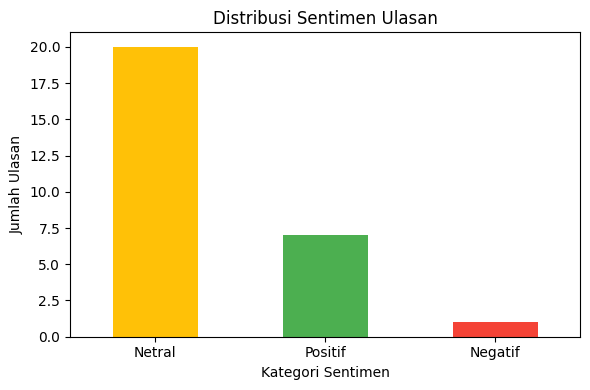

In [ ]:
# 6. Visualisasi
plt.figure(figsize=(6,4))
colors = {"Positif": "#4CAF50", "Negatif": "#F44336", "Netral": "#FFC107", "Kosong": "#9E9E9E"}
sentimen_counts.plot(kind='bar', color=[colors.get(s, "#333333") for s in sentimen_counts.index])

plt.title("Distribusi Sentimen Ulasan")
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [4]:
plt.savefig('grafik_sentimen.png')


<Figure size 640x480 with 0 Axes>

In [72]:
sentimen_count = df["sentimen"].value_counts().reset_index()
sentimen_count.columns = ["Sentimen", "Jumlah"]

sentimen_count.to_excel("g2g_review.xlsx", index=False)

In [71]:
df[['Ulasan_Bersih']].to_excel('g2g.xlsx', index=False)
print('Data ulasan bersih berhasil disimpan ke ulasan_bersih.csv')

Data ulasan bersih berhasil disimpan ke ulasan_bersih.csv
